# `dmradar` 

Seeing the `dmnatilus` rotated image inspired the idea that rather than be restricted to rectangular grids we could also 
implement this type of divide-in-half algorithm using other grids.  The original idea was to use rotated boxes and then 
quickly lead to allowing for a polar grid.

So, `dmradar` does the same thing as `dmnautilus` except instead of dividing the `X` and `Y` axis lengths by 2.0, it
divides the `radius` and `angle`  by 2.0 creating an ellipse (or rotbox) from some input center `X` and `Y` location.

It uses the same `method` parameter in the same way as `dmnautilus`.



```bash
git clone https://github.com/kglotfelty/dmradar
```

Contact me for help building.


In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Mon Jan 21 16:57:26 EST 2019


In [2]:
# Routine to display images using ds9 in notebook
display_map()
{
img=$1
map=$2
png=$3
reg=$4

if test x${reg} == x
then
  region=""
else
  region="-region $reg"
fi

ds9 -geom 1550x824 -scale asinh -scale limits 0 200 \
  -zoom 2 -cmap load sunset-in-atlantis.sao  \
  -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
  $img \
  -frame new -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
  $map -scale linear -scale mode minmax \
  $region -regions select all -regions color black -regions select none \
  -tile yes \
  -saveimage png $png -exit 

display < $png
}

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

### Example 

In this simple example we create a circular polar grid starting 15 physical pixels from the centroid 
(determined using `dmstat`) out to a radius of 2000 physical pixels.  With `method=4`, each
pie slice must have a SNR above 15.8 (~300 counts). 


In [4]:
dmstat smimg.fits cen- verb=0
px=`stk_read_num ")dmstat.out_max_loc" 1 echo+`
py=`stk_read_num ")dmstat.out_max_loc" 2 echo+`

dmradar img.dss.fits radar.4.img 15.8 outmask=radar.4.map method=4 clob+ \
  xcenter="$px" ycenter="$py" \
  shape=pie rstart=15 rstop=2000 clob+

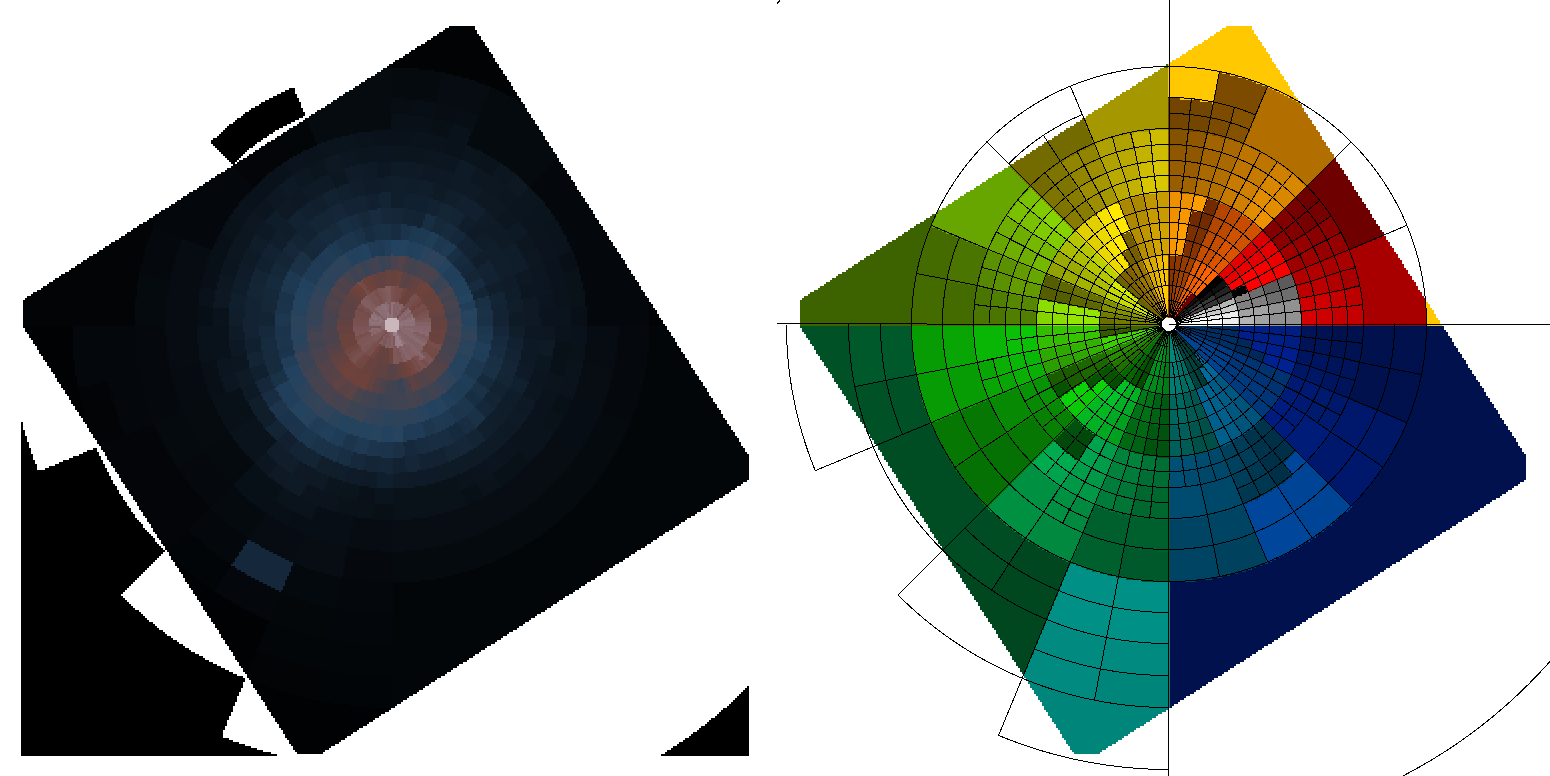

In [5]:
display_map radar.4.img radar.4.map radar.4.png

The output looks somewhat similar to the `mkregmap` example above with the `pgrid()` syntax.  However, this tool
allows the angular width and radius to adjust based on the pixel values.

There are additional parameter to control 

- the starting & ending angles
- the minimum angle and radius size
- the ellipticity (default is 1=circular)
- shape (pie|epanda|bpanda|box).

The `pie` shape is really the same as `epanda` except it runs much faster.  `box` essentially replicates the original
`dmnautilus` behavior, however, 

> Due to numerical precision, there can be gaps in the map.  Fixing this is **TBD**